<a href="https://colab.research.google.com/github/gwenostergren/20MA573/blob/master/src/HW02fd2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Abstract
- Goal:
    - Learn the second order derivative approximation: second order central finite difference
    - Understand convergence rate


# Problem 

Let $f(x) = \sin x$. Plot $f''$ and $\delta_{-h} \delta_h f$ with $h = .5$

# Analysis


One of the commonly used FD for $f''$ is the following:
$$f''(x) = \frac{d}{dx} f'(x) \simeq \delta_h f'(x) \simeq \delta_h \delta_{-h} f(x).$$
If we write it explicitly, then
$$f''(x) \simeq \frac{f(x+h) - 2 f(x) + f(x-h)}{h^2}.$$

__Prop__

The central finite difference for the second order has convergence order $1$.

__Proof__ 

The CFD can be defined as $\delta_{\pm h} f'$ for $f''$. Or, $\delta_{\pm h} f'(x) \simeq \frac{1}{2}(\delta_h f'(x) + \delta_{-h}f'(x)) \simeq f''(x)$

# Code

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def sfd(f, x, h):
    return (f(x+h) - 2*f(x) + f(x-h))/h**2
    pass


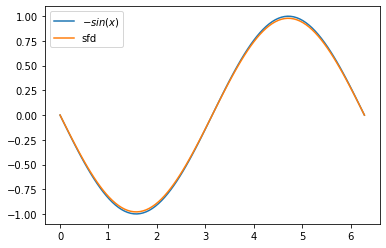

In [13]:
'''
Remove all #s below to plot a figure:
    x_cod: points at which the derivative to be computed
    y_cod: estimated derivative by finite difference
'''



h = .5 #step size

x_co = np.linspace(0, 2*np.pi, 100)
plt.plot(x_co, - np.sin(x_co), label = '$-sin(x)$');
plt.plot(x_co, sfd(np.sin, x_co, h), label = 'sfd');
plt.legend();

plot log-log chart for the demonstration of convergence rate, find convergence order using linear regression.

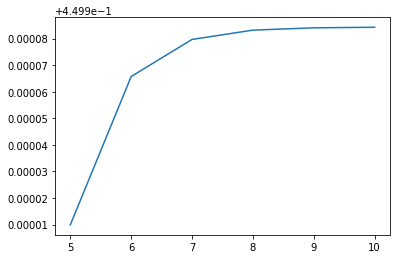

In [15]:
x_target = np.pi/3 #target point to be examined
y_target = np.cos(x_target) #exact derivative value at the target point

nn = np.arange(5, 11)
hh = 1/np.power(2, nn) #step sizes to be taken
err = sfd(np.sin, x_target, hh) - y_target #errors corresponding to each step size
yy = np.log2(np.abs(err))
plt.plot(nn, yy)



#Increasing Rate of Finite Difference 


1.   Suppose that we wish to approximate the rst derivative $u'(x)$ of a very smooth function with
an error of only $O(h)^4$, where $h$ is the step size. Which dierence approximation could we use?
(Hint: you may consider to use more than two points in the neighborhood)

  If we use CFD on four points in the neighborhood of the target, then the order of convergence should be four.



2.   Let $f : R \to R$ be a smooth even function satisfying $f(0) = 0$. Our objective is to approximate
the second order derivative $f''(0)$.
  - Prove that $f'(0)=0$
    We know 
    $$f'(0)= \lim_{x \to 0} \frac{f(x)-f(0)}{x-0} = \lim_{x \to 0} \frac{f(x)}{x}$$ 
    And since f is even, $f(x) = f(-x)$. So, 
    $$f'(0) = \lim_{x \to 0} \frac{f(-x)}{x}$$ 
    Let $a=-x$. Plugging in a gives us 
    $$f'(0)=\lim_{z \to 0} \frac{f(a)}{-a} = - \lim_{a \to 0} \frac{f(a)}{a} = -f'(0)$$
    The only possible solution to $f'(0)$ is 0.
  - Let $a_h = \frac{2f(h)}{h^2}$ be a proposed estimator for $f''(0)$ with step size $h$. Justify it has convergence $O(h^2)$ 
    From above, we have the approximation 
    $$f''(x) \simeq \frac{f(x+h) - 2 f(x) + f(x-h)}{h^2}$$
    

